In [31]:
pip install Sastrawi

     |████████████████████████████████| 215kB 5.1MB/s 


In [77]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [79]:
import tweepy
from tweepy import Stream
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re,string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [2]:
code_data = open('twittercode.csv')
code = csv.reader(code_data, delimiter=',')
data_code = [row[2] for row in code]

In [3]:
consumer_key = data_code[0]
consumer_secret = data_code[1]
access_token = data_code[2]
access_token_secret = data_code[3]

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [205]:
data = []
for tweet in tweepy.Cursor(api.search, q='smart city', lang="id", since='2021-01-01').items(500):
  text = tweet.text
  def hapus_tanda(text): 
      tanda_baca = set(string.punctuation)
      tweet = ''.join(ch for ch in text if ch not in tanda_baca)
      return text
    
  text=text.lower()
  text = re.sub(r'\\u\w\w\w\w', '', text)
  text=re.sub(r'http\S+','',text)
  #hapus @username
  text =re.sub('@[^\s]+','',text)
  #hapus #tagger 
  text = re.sub(r'#([^\s]+)', r'\1', text)
  #hapus tanda baca
  text=hapus_tanda(text)
  #hapus angka dan angka yang berada dalam string 
  text=re.sub(r'\w*\d\w*', '',text).strip()

  #stemming
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = stemmer.stem(text)
  data.append(text)

In [206]:
len(data)

202

Nilai rata-rata: -0.21287128712871287
Standar deviasi: 1.5153448365081812


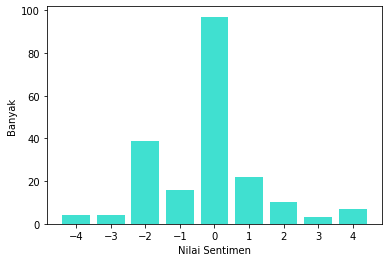

In [243]:
hasil = []
pos_list= open("kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("kata_negatif.txt","r")
neg_kata = neg_list.readlines()

for item in data:
  count_p = 0
  count_n = 0
  for kata_pos in pos_kata:
    if kata_pos.strip() in item:
      count_p +=1
  for kata_neg in neg_kata:
    if kata_neg.strip() in item:
      count_n +=1
  hasil.append(count_p - count_n)

print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))
labels, counts = np.unique(hasil, return_counts=True)
fig1, ax1 = plt.subplots()
ax1.bar(labels, counts, color='turquoise', align='center')
ax1.set_xticks(labels)
ax1.set_xlabel('Nilai Sentimen')
ax1.set_ylabel('Banyak')
plt.show()

In [244]:
fig1.savefig('sentimen.png')

In [209]:
total_pos = 0
total_net = 0
total_neg = 0
for n in hasil:
  if n < 0:
    total_pos += 1
  elif n == 0:
    total_net += 1
  else:
    total_neg += 1

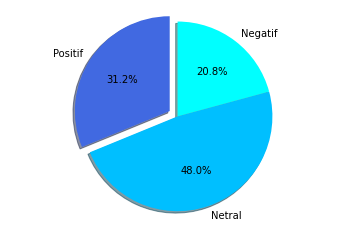

In [210]:
nilai = [total_pos, total_net, total_neg]
label = ['Positif', 'Netral', 'Negatif']
explode = (0.1, 0, 0)
mycolors = ["royalblue", "deepskyblue", "cyan"]
fig2, ax2 = plt.subplots()
ax2.pie(nilai, explode=explode, labels=label, autopct='%1.1f%%', shadow=True, startangle=90, colors=mycolors)
ax2.axis('equal')
plt.show()

In [238]:
fig2.savefig('piechart.png')

In [212]:
indonesia_s = stopwords.words('indonesian')
kata_lain = ['smart', 'city', 'rt', 'yg', 'lihat', 'sana', 'sy', 'tiap', 'mbak', 'bnran', 'gapernah', 'tuh', 'risma','dr', 'aneh', 'ngantor', 'tunawisma', 'muncul', 'sma', 'aja', 'bu', 'klw']
for kata in kata_lain:
  indonesia_s.append(kata)

In [213]:
data_baru = []
for hasil in data:
    hasil = hasil.split()
    hasil  = [word for word in hasil if word not in indonesia_s]
    hasil = ' '.join(hasil)
    data_baru.append(hasil)

In [214]:
data_baru = [word_tokenize(paragraf) for paragraf in data_baru]

In [215]:
data_baru = list(itertools.chain(*data_baru))
fqdist = FreqDist(data_baru)

In [216]:
print(fqdist.most_common(100))

[('dtn', 34), ('jakarta', 33), ('cctv', 26), ('jkt', 25), ('surabaya', 17), ('netizennya', 12), ('kejam', 12), ('netizen', 12), ('gimana', 12), ('rekam', 12), ('ditaya', 11), ('green', 11), ('master', 11), ('buka', 11), ('kota', 10), ('tuju', 10), ('gwadar', 10), ('energy', 10), ('indonesia', 9), ('pro', 9), ('bus', 9), ('bro', 8), ('wkwkwkwk', 8), ('hai', 8), ('harap', 8), ('inka', 8), ('kya', 7), ('ki', 7), ('ka', 7), ('utama', 7), ('listrik', 7), ('uji', 7), ('dunia', 6), ('berkas', 6), ('makassar', 6), ('utk', 6), ('-', 6), ('sudirman-thamrin', 6), ('cocok', 6), ('kabar', 6), ('tau', 5), ('sdh', 5), ('a', 5), ('prioritas', 5), ('wujud', 5), ('raha', 5), ('bana', 5), ('selamat', 5), ('to', 5), ('h', 5), ('data', 5), ('jokowi', 5), ('operasional', 5), ('e-inobus', 5), ('tutup', 4), ('kiosk', 4), ('nya', 4), ('dgn', 4), ('takut', 4), ('terap', 4), ('milik', 4), ('didik', 4), ('at', 4), ('tirupati', 4), ('innovation', 4), ('transportasi', 4), ('s', 4), ('industri', 4), ('ya', 4), ('had

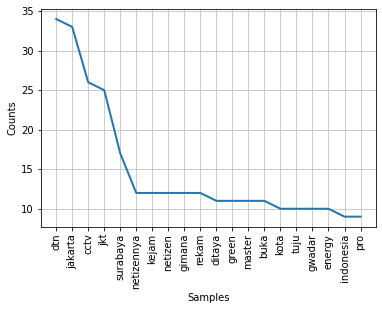

In [217]:
fqdist.plot(20,cumulative=False)
plt.show()

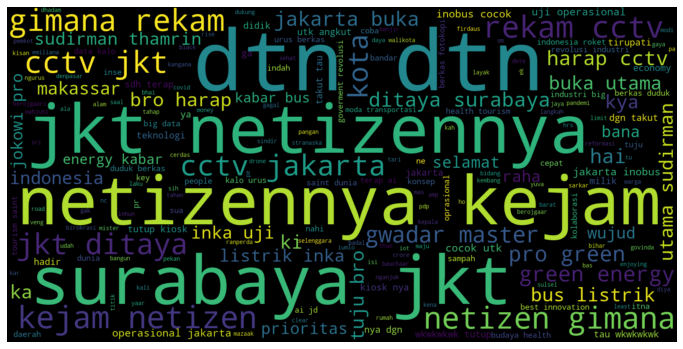

In [245]:
data_1 = ' '.join(data_baru)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(data_1)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [219]:
data_hari1= []
for tweet in tweepy.Cursor(api.search, q='smart city', lang="id", since='2021-01-01', until='2021-01-02').items(200):
  text = tweet.text
  data_hari1.append(text)

In [220]:
data_hari2= []
for tweet in tweepy.Cursor(api.search, q='smart city', lang="id", since='2021-01-02', until='2021-01-03').items(200):
  text = tweet.text
  data_hari2.append(text)

In [221]:
data_hari3= []
for tweet in tweepy.Cursor(api.search, q='smart city', lang="id", since='2021-01-03', until='2021-01-04').items(200):
  text = tweet.text
  data_hari3.append(text)

In [222]:
data_hari4= []
for tweet in tweepy.Cursor(api.search, q='smart city', lang="id", since='2021-01-04', until='2021-01-05').items(200):
  text = tweet.text
  data_hari4.append(text)

In [223]:
data_hari5= []
for tweet in tweepy.Cursor(api.search, q='smart city', lang="id", since='2021-01-04', until='2021-01-05').items(200):
  text = tweet.text
  data_hari5.append(text)

In [224]:
data_hari6= []
for tweet in tweepy.Cursor(api.search, q='smart city', lang="id", since='2021-01-05', until='2021-01-06').items(200):
  text = tweet.text
  data_hari6.append(text)

In [225]:
data_hari7= []
for tweet in tweepy.Cursor(api.search, q='smart city', lang="id", since='2021-01-06', until='2021-01-07').items(200):
  text = tweet.text
  data_hari7.append(text)

In [228]:
banyak_tweet_perhari = [len(data_hari1), len(data_hari2), len(data_hari3), len(data_hari4), len(data_hari5),len(data_hari6), len(data_hari7)]
tanggal = ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07']

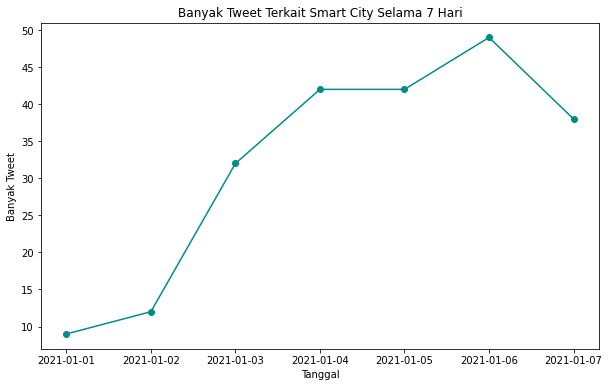

In [241]:
fig3, ax3 = plt.subplots(figsize=(10,6))
ax3.plot(tanggal, banyak_tweet_perhari, marker='o', color='darkcyan')
ax3.set_xlabel('Tanggal')
ax3.set_ylabel('Banyak Tweet')
ax3.set_title('Banyak Tweet Terkait Smart City Selama 7 Hari')
plt.show()

In [242]:
fig3.savefig('tweet_perhari.png')